# IRIS Dataset using Tree based 

In [1]:
from sklearn.datasets import load_iris

iris = load_iris()

X = iris.data
y = iris.target

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, stratify=y)

In [2]:
from sklearn.tree import DecisionTreeClassifier

dtc = DecisionTreeClassifier()     #Instantiate tree class
dtc.fit(X_train, y_train)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

In [3]:
from sklearn.metrics import accuracy_score

y_pred = dtc.predict(X_test)
accuracy_score(y_test, y_pred)

0.9555555555555556

In [8]:
import numpy as np
from sklearn import tree
from sklearn.externals.six import StringIO
import pydot
from IPython.display import Image

dot_iris = StringIO() 
tree.export_graphviz(dtc, out_file = dot_iris, feature_names = iris.feature_names) 
graph = pydot.graph_from_dot_data(dot_iris.getvalue())
Image(graph.create_png())

AttributeError: ignored

# Random Forest to classify digits 

In [12]:
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

In [9]:
from sklearn.datasets import load_digits
digits = load_digits()
digits.keys()

dict_keys(['data', 'target', 'target_names', 'images', 'DESCR'])

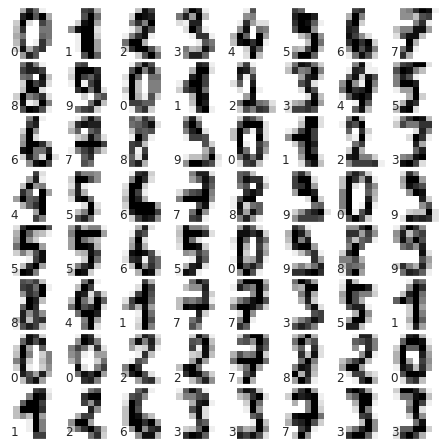

In [13]:
# set up the figure
fig = plt.figure(figsize=(6, 6))  # figure size in inches
fig.subplots_adjust(left=0, right=1, bottom=0, top=1, hspace=0.05, wspace=0.05)

# plot the digits: each image is 8x8 pixels
for i in range(64):
    ax = fig.add_subplot(8, 8, i + 1, xticks=[], yticks=[])
    ax.imshow(digits.images[i], cmap=plt.cm.binary, interpolation='nearest')
    
    # label the image with the target value
    ax.text(0, 7, str(digits.target[i]))

In [16]:
# Classigy digits using RF classieir 
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier

Xtrain, Xtest, ytrain, ytest = train_test_split(digits.data, digits.target,
                                                random_state=0)
model = RandomForestClassifier(n_estimators=1000)
model.fit(Xtrain, ytrain)
ypred = model.predict(Xtest)

In [17]:
from sklearn import metrics
print(metrics.classification_report(ypred, ytest))

              precision    recall  f1-score   support

           0       1.00      0.97      0.99        38
           1       0.98      0.98      0.98        43
           2       0.95      1.00      0.98        42
           3       0.98      0.98      0.98        45
           4       0.97      1.00      0.99        37
           5       0.96      0.96      0.96        48
           6       1.00      1.00      1.00        52
           7       1.00      0.96      0.98        50
           8       0.96      0.98      0.97        47
           9       0.98      0.96      0.97        48

    accuracy                           0.98       450
   macro avg       0.98      0.98      0.98       450
weighted avg       0.98      0.98      0.98       450



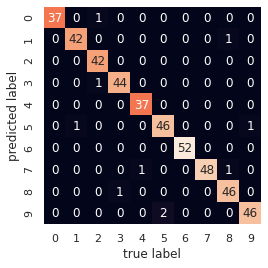

In [18]:
# Plot confusion matrix 
from sklearn.metrics import confusion_matrix
mat = confusion_matrix(ytest, ypred)
sns.heatmap(mat.T, square=True, annot=True, fmt='d', cbar=False)
plt.xlabel('true label')b
plt.ylabel('predicted label');

# Promotion Recommendation using HR data (using XGBoost Classifier)

In [19]:
# Importing the library 

from xgboost import XGBClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import roc_auc_score
from sklearn.metrics import f1_score
import pandas as pd
from sklearn import preprocessing

from xgboost import plot_importance
import numpy as np
from sklearn.metrics import confusion_matrix


from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler

pd.set_option('display.max_columns', 500)
pd.set_option('display.max_rows', 500)

In [21]:
from google.colab import files
upload_file=files.upload()

Saving Train_HR.csv to Train_HR.csv


In [24]:
df = pd.read_csv("Train_HR.csv")
df.set_index('employee_id',inplace=True)

In [25]:
from google.colab import files
upload_file=files.upload()

Saving Test_HR.csv to Test_HR.csv


In [29]:
df_Test = pd.read_csv("Test_HR.csv")
df_Test.set_index('employee_id',inplace=True)
df_Test['is_promoted'] = 5



In [32]:
# Merging Train and Test 
df_com = pd.concat([df,df_Test])
df_com.shape

(78298, 13)

In [33]:
df['previous_year_rating'].describe()

count    50684.000000
mean         3.329256
std          1.259993
min          1.000000
25%          3.000000
50%          3.000000
75%          4.000000
max          5.000000
Name: previous_year_rating, dtype: float64

In [34]:
df['education'].describe()


count          52399
unique             3
top       Bachelor's
freq           36669
Name: education, dtype: object

In [35]:

## Filling missing enteris with maximum occuring event
df_com['previous_year_rating'].fillna(3.0, inplace=True)
df_com['education'].fillna('Bachelor\'s', inplace=True)

In [36]:
df_com['age'].describe()

count    78298.000000
mean        34.797619
std          7.665928
min         20.000000
25%         29.000000
50%         33.000000
75%         39.000000
max         60.000000
Name: age, dtype: float64

In [39]:
### Dividing age into different bands as this company has 9 verticals and they are finding promotion for manager and below.So didvided
###age into 4 different bands
'''
def findBand(age):
    if age <=25:
        return 1
    elif age>25 and age<=35:
        return 2
    elif age>35 and age<=45:
        return 3
    else:
        return 4

df_com['band'] = df_com['age'].apply(findBand)
'''

In [40]:
df_com.head()

,department,region,education,gender,recruitment_channel,no_of_trainings,age,previous_year_rating,length_of_service,KPIs_met >80%,awards_won?,avg_training_score,is_promoted,band
employee_id,,,,,,,,,,,,,,
65438,Sales & Marketing,region_7,Master's & above,f,sourcing,1,35,5.0,8,1,0,49,0,2
65141,Operations,region_22,Bachelor's,m,other,1,30,5.0,4,0,0,60,0,2
7513,Sales & Marketing,region_19,Bachelor's,m,sourcing,1,34,3.0,7,0,0,50,0,2
2542,Sales & Marketing,region_23,Bachelor's,m,other,2,39,1.0,10,0,0,50,0,3
48945,Technology,region_26,Bachelor's,m,other,1,45,3.0,2,0,0,73,0,3


In [41]:

##One hot encoding
df_com = pd.concat([df_com[['no_of_trainings','age','previous_year_rating','length_of_service','KPIs_met >80%','awards_won?','avg_training_score','is_promoted']],
               pd.get_dummies(df_com['gender'],drop_first = True),pd.get_dummies(df_com['education'],drop_first = True),pd.get_dummies(df_com['recruitment_channel'],drop_first = True),pd.get_dummies(df_com['department'],drop_first = True),pd.get_dummies(df_com['region'],drop_first = True)],axis=1)

In [42]:

###Generating all possible pair of interactions between 2 pair of columns.
##Then removing those columns 

from itertools import combinations
from sklearn.preprocessing import PolynomialFeatures

Y = df_com.is_promoted
X = df_com.drop(['is_promoted'],1)
 


def add_interactions(df):
    combos = list(combinations(list(df.columns), 2))
    colnames = list(df.columns)+['_'.join(x) for x in combos]
    
    #scaler = MinMaxScaler()
    #scaler.fit(df)
    #df = scaler.transform(df)
    
    poly = PolynomialFeatures(interaction_only=True, include_bias=False)
    df = poly.fit_transform(df)
    df = pd.DataFrame(df)
    df.columns = colnames
    
    noint_indices = [i for i,x in enumerate(list((df==0).all())) if x]
    df= df.drop(df.columns[noint_indices], axis=1)
    
    return df
X = add_interactions(X)
X.shape

(78298, 830)

In [43]:
###Seperate out the training and testing dataset

X.index = Y.index
X['is_promoted'] = Y

X_validation = X[54808:]
X = X[0:54808]

In [44]:
X_validation.shape

(23490, 831)

In [45]:
Y = X.is_promoted
X = X.drop(['is_promoted'],1)
 

seed = 1234
test_size = 0.3
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=test_size, random_state=seed)

In [48]:
### Hypertune the model intensively with a 5 fold cross validation strategy.
##  first grid search for max_depth,min_child_weight then fix those and search for rest in same fashion
### parameter scale_pos_weight is quite important in case of imbalanced dataset

from sklearn.model_selection import GridSearchCV
param_test2b = {
  #'min_child_weight':[5,6],
  #'max_depth': range(3,10,2),
  #'n_estimators':[150,200,300,400],
  #'scale_pos_weight':[1,2,3,4],
  #'colsample_bytree':[0.7,0.8], 
  #'subsample':[0.7,0.8],
  #'gamma':[0,0.2.0.4]
    
}
gsearch2b = GridSearchCV(estimator = XGBClassifier( learning_rate=0.1, n_estimators=150, max_depth=10,
 min_child_weight=1, gamma=0, subsample=0.8, colsample_bytree=0.8,
 objective= 'binary:logistic', nthread=4, scale_pos_weight=3,seed=27), 
 param_grid = param_test2b, scoring='f1',n_jobs=4,iid=False, cv=5)
gsearch2b.fit(X_train, y_train)
print(gsearch2b.cv_results_)
print("gsearch2b.best_params_",gsearch2b.best_params_)
print("gsearch2b.best_score_",gsearch2b.best_score_)

/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_search.py:823: FutureWarning: The parameter 'iid' is deprecated in 0.22 and will be removed in 0.24.
  "removed in 0.24.", FutureWarning


{'mean_fit_time': array([594.40696726]), 'std_fit_time': array([211.54838542]), 'mean_score_time': array([0.50534315]), 'std_score_time': array([0.31125686]), 'params': [{}], 'split0_test_score': array([0.50087566]), 'split1_test_score': array([0.51308901]), 'split2_test_score': array([0.49911817]), 'split3_test_score': array([0.5042333]), 'split4_test_score': array([0.50754215]), 'mean_test_score': array([0.50497166]), 'std_test_score': array([0.00498166]), 'rank_test_score': array([1], dtype=int32)}
gsearch2b.best_params_ {}
gsearch2b.best_score_ 0.5049716554064465


In [49]:
print(gsearch2b.cv_results_)

{'mean_fit_time': array([594.40696726]), 'std_fit_time': array([211.54838542]), 'mean_score_time': array([0.50534315]), 'std_score_time': array([0.31125686]), 'params': [{}], 'split0_test_score': array([0.50087566]), 'split1_test_score': array([0.51308901]), 'split2_test_score': array([0.49911817]), 'split3_test_score': array([0.5042333]), 'split4_test_score': array([0.50754215]), 'mean_test_score': array([0.50497166]), 'std_test_score': array([0.00498166]), 'rank_test_score': array([1], dtype=int32)}


In [52]:
###Train the model with the best params
modelXg = XGBClassifier(learning_rate=0.1, n_estimators=200, max_depth=4, min_child_weight=7, 
                      gamma=0.4,nthread=4, subsample=0.8, colsample_bytree=0.8, objective= 'binary:logistic',scale_pos_weight=3,seed=29)
modelXg.fit(X_train, y_train)
y_xg = modelXg.predict(X_test)

In [62]:
## Determine whether your model is overfitting or not , with the help of ROC.
print(confusion_matrix(y_test, y_xg))
predictions = [value for value in y_xg]
accuracy = accuracy_score(y_test, predictions)
precision = precision_score(y_test, predictions)
recall = recall_score(y_test, predictions)
f1 = f1_score(y_test, predictions)
print("Accuracy_score: %.2f%% on test dataset" % (accuracy * 100.0))
print("precision_score: %.2f%% on test dataset" % (precision * 100.0))
print("recall_score: %.2f%% on test dataset" % (recall * 100.0))
print("f1_score: %.2f%% on test dataset" % (f1 * 100.0))
print("roc_auc test set", roc_auc_score(y_test, modelXg.predict_proba(X_test)[:,1]))
print("roc_auc training set", roc_auc_score(y_train, modelXg.predict_proba(X_train)[:,1]))

[[14748   297]
 [  809   589]]
Accuracy_score: 93.27% on test dataset
precision_score: 66.48% on test dataset
recall_score: 42.13% on test dataset
f1_score: 51.58% on test dataset
roc_auc test set 0.9101011462512796
roc_auc training set 0.9381088639703592


In [63]:
##Once the model is ready, train the model on entire dataset.
modelXg = XGBClassifier(learning_rate=0.1, n_estimators=200, max_depth=4, min_child_weight=7, 
                      gamma=0.4,nthread=4, subsample=0.8, colsample_bytree=0.8, objective= 'binary:logistic',scale_pos_weight=3,seed=29)

modelXg.fit(X, Y)

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=0.8, gamma=0.4,
              learning_rate=0.1, max_delta_step=0, max_depth=4,
              min_child_weight=7, missing=None, n_estimators=200, n_jobs=1,
              nthread=4, objective='binary:logistic', random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=3, seed=29,
              silent=None, subsample=0.8, verbosity=1)

In [65]:

'''
##find the useful cols
usefulcols = []
for i in sorted( model.booster().get_fscore().items(), key=lambda x: x[1], reverse=True)[:100]:
    usefulcols.append(i[0])
print(usefulcols)
'''

AttributeError: ignored

In [66]:
X = X_validation.drop(['is_promoted'],1)
df_Test = X_validation.drop(['is_promoted'],1)
y_valid = modelXg.predict(df_Test)
submission = df_Test.copy()
submission['is_promoted'] = y_valid
submission['is_promoted'].value_counts()

0    22289
1     1201
Name: is_promoted, dtype: int64

In [67]:
submission = submission[['is_promoted']]
submission.reset_index(inplace=True)
submission.to_csv("HR_Attrition.csv",index=False)

In [69]:
df1=pd.read_csv('HR_Attrition.csv')
df1.head()

,employee_id,is_promoted
0,8724,0
1,74430,0
2,72255,0
3,38562,0
4,64486,0


In [70]:

private = pd.read_csv("private_W1BajhK.csv")
private.columns = ['employee_id', 'actual']
private = private.merge(sub, on = "employee_id", how="left")


FileNotFoundError: ignored

In [ ]:
from sklearn.metrics import f1_score
f1_score(private['actual'], private['is_promoted'])